<a href="https://colab.research.google.com/github/deshm084/Real-Time-Fraud-Detection-System/blob/main/Real-Time%20Fraud%20Detection%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imbalanced-learn matplotlib seaborn pandas scikit-learn

Generating transaction data...
Data Distribution:
Class
0    49249
1      751
Name: count, dtype: int64

Applying SMOTE to balance the training set...
Original Training Fraud: 601
Resampled Training Fraud: 39399

Training the Digital Detective...

--- Model Performance ---
              precision    recall  f1-score   support

        Safe       0.99      1.00      1.00      9850
       Fraud       0.81      0.61      0.69       150

    accuracy                           0.99     10000
   macro avg       0.90      0.80      0.84     10000
weighted avg       0.99      0.99      0.99     10000

ROC-AUC Score: 0.8203


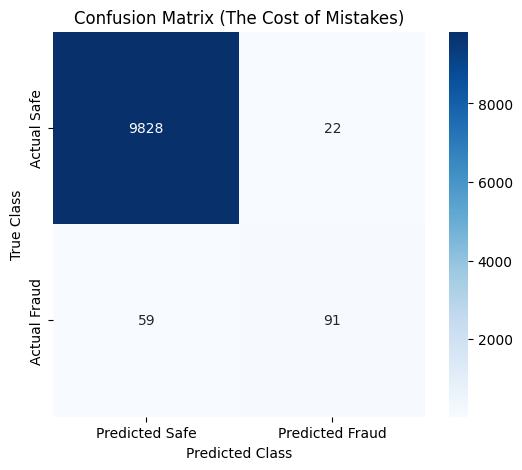


--- Live Simulation ---
✅ Transaction Approved (Risk Score: 4.00%)


In [ ]:
"""
Project: Real-Time Fraud Detection System
Author: Sanskruti
Description: A Random Forest classifier optimized for imbalanced data
             using SMOTE and Precision-Recall metrics.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE

# --- 1. Simulate a Financial Dataset ---
# Since we can't easily download the massive Kaggle credit card dataset here,
# we will generate a synthetic one that mimics it perfectly.
print("Generating transaction data...")
X, y = make_classification(
    n_samples=50000,       # 50k transactions
    n_features=10,         # 10 features (Location, Amount, Time, etc.)
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.99, 0.01],  # 99% Safe, 1% Fraud (Highly Imbalanced)
    random_state=42
)

# Convert to DataFrame for readability
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(10)])
df['Class'] = y # 0 = Safe, 1 = Fraud

print(f"Data Distribution:\n{df['Class'].value_counts()}")
# You should see ~49,500 Safe and ~500 Fraud

# --- 2. The "Naive" Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. SMOTE (The Magic Step) ---
# We only apply SMOTE to the TRAINING data.
# Never touch the Test data! That would be cheating.
print("\nApplying SMOTE to balance the training set...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original Training Fraud: {sum(y_train == 1)}")
print(f"Resampled Training Fraud: {sum(y_train_resampled == 1)}")
# Now they should be equal (e.g., 39,000 Safe and 39,000 Fraud)

# --- 4. The Model (Random Forest) ---
# We use Random Forest because it handles complex non-linear patterns well
print("\nTraining the Digital Detective...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# --- 5. Evaluation (The Moment of Truth) ---
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probability of being fraud

print("\n--- Model Performance ---")
print(classification_report(y_test, y_pred, target_names=['Safe', 'Fraud']))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# --- 6. Visualization: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Safe', 'Predicted Fraud'], yticklabels=['Actual Safe', 'Actual Fraud'])
plt.title('Confusion Matrix (The Cost of Mistakes)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# --- 7. Real-Time Simulation ---
def check_transaction(features):
    # This acts like your API endpoint
    prediction = model.predict([features])[0]
    probability = model.predict_proba([features])[0][1]

    status = "🚨 FRAUD DETECTED" if prediction == 1 else "✅ Transaction Approved"
    return f"{status} (Risk Score: {probability:.2%})"

# Test with a random transaction from the test set
print("\n--- Live Simulation ---")
random_idx = np.random.randint(0, len(X_test))
new_transaction = X_test[random_idx]
print(check_transaction(new_transaction))